# Hochschule Bonn-Rhein-Sieg
### Scientific Experimentation and Evaluation, SS18
### youBot placing experiment

submitted by: `Abhishek Padalkar, Max Mensing, Pranjal Dhole`

## Packages

In [1]:
import numpy as np
import os
from scipy import stats
from math import ceil

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sb

%matplotlib inline

## Importing data

### Initial pose
This pose is given in the SEE User Manual.

In [2]:
initial_pose = np.array([-79.27, -99.87, -1.62])
target_straight = np.array([-79.40, -87.48, -1.72])
target_left = np.array([-109.65, -102.75, -2.10])
target_right = np.array([-41.73, -88.63, -0.92])

### Fetching collected data from CSV to a dictionary

In [3]:
def get_original_data_filepath(filename):
    PATH = os.getcwd()
    return PATH+'/recordings/CSVs/'+filename+'.csv'

def get_combined_data_filepath(filename):
    PATH = os.getcwd()
    return PATH+'/recordings/AlldataCSV/'+filename+'.csv'

def fetch_original_data(filename):
    return np.loadtxt(get_original_data_filepath(filename), delimiter=',')

def fetch_combined_data(filename):
    return np.loadtxt(get_combined_data_filepath(filename), delimiter=',')

In [4]:
def distribution_plot(load, motion, db, save=False, show_fig=True):
    fname = load+'_'+motion
    d = db[fname]
    distr = sb.jointplot(d[:,0], d[:,1], kind='kde')
    distr.set_axis_labels(xlabel='distance x (cm)', ylabel='distance y (cm)')
    if save:
        plt.savefig('images/'+fname)
    if show_fig:
        plt.show()
    plt.close()

In [5]:
def collect_original_data(load, move, generate_plots=False):
    data = {}
    for i in load:
        for j in move:
            filename = i+'_'+j
            data[filename] = fetch_original_data(filename)
            if generate_plots:
                distribution_plot(load=i, motion=j, db=data, save=True, show_fig=False)
    return data

def collect_combined_data(load, move, generate_plots=False):
    data = {}
    for i in load:
        for j in move:
            filename = i+'_'+j
            data[filename] = fetch_combined_data(filename)
            if generate_plots:
                distribution_plot(load=i, motion=j, db=data, save=True, show_fig=False)
    return data

In [6]:
load = ['small', 'medium', 'big']
move = ['left', 'right', 'straight']

In [7]:
data = collect_original_data(load, move, generate_plots=True)

## Visualizing poses

In [8]:
def plot_data(left, right, straight, initial,\
              target_left, target_right, target_straight,\
              load_type, combined_data=False, save_fig=False, zoom_size=4, zoom_xylim=7):
    lx, ly, lt = left[:, 0], left[:, 1], left[:, 2]
    rx, ry, rt = right[:, 0], right[:, 1], right[:, 2]
    sx, sy, st = straight[:, 0], straight[:, 1], straight[:, 2]
    ix, iy, it = initial[0], initial[1], initial[2]
    ix_left, iy_left, it_left = target_left[0], target_left[1], target_left[2]

    lx_mean = lx.mean(); ly_mean = ly.mean(); lt_mean = lt.mean()
    rx_mean = rx.mean(); ry_mean = ry.mean(); rt_mean = rt.mean()
    sx_mean = sx.mean(); sy_mean = sy.mean(); st_mean = st.mean()

    # fig, ax = plt.subplots()
    fig = plt.figure(figsize=(14, 14))
    ax = plt.gca()
    
    left_motion = ax.scatter(lx, ly, c='r', label=('left motion'.format(load_type)))
    right_motion = ax.scatter(rx, ry, c='b', label=('right motion'.format(load_type)))
    straight_motion = ax.scatter(sx, sy, c='g', label=('straight motion'.format(load_type)))
    
    left_mean = ax.scatter(lx_mean, ly_mean, c='k', marker='x',
                           label=('left motion mean value'.format(load_type)))
    right_mean = ax.scatter(rx_mean, ry_mean, c='k', marker='x',
                            label=('right motion mean value'.format(load_type)))
    straight_mean = ax.scatter(sx_mean, sy_mean, c='k', marker='x',
                               label=('straight motion mean value'.format(load_type)))
    initial = ax.scatter(ix, iy, c='k', label=('Initial pose'.format(load_type)))
    t_left = ax.scatter(ix_left, iy_left, c='k', marker='+',\
                        label=('Target left pose'.format(load_type)))
    t_right = ax.scatter(target_right[0], target_right[1], c='k', marker='+',\
                         label=('Target right pose'.format(load_type)))
    t_straight = ax.scatter(target_straight[0], target_straight[1], c='k', marker='+',\
                            label=('Target straight pose'.format(load_type)))
    
    # Setup of zoom-in figure and legend position
    ax.legend(loc=1)
    
    axin_l = zoomed_inset_axes(ax, zoom_size, loc=3)
    mark_inset(ax, axin_l, loc1=1, loc2=2, fc="none", ec="0.5")
    
    axin_r = zoomed_inset_axes(ax, zoom_size, loc=4)
    mark_inset(ax, axin_r, loc1=1, loc2=2, fc="none", ec="0.5")
    
    axin_s = zoomed_inset_axes(ax, zoom_size, loc=8)
    mark_inset(ax, axin_s, loc1=1, loc2=2, fc="none", ec="0.5")

    # Plot into zoom-in figures
    axin_l.scatter(lx, ly, c='r', label=('left wheel'.format(load_type)))
    axin_l.scatter(lx_mean, ly_mean, c='k', marker='x',label=('left zoomed'.format(load_type)))
    axin_l.set_xlim(lx_mean-zoom_xylim, lx_mean+zoom_xylim)
    axin_l.set_ylim(ly_mean-zoom_xylim, ly_mean+zoom_xylim)
    axin_l.grid(color='b', linestyle='-', linewidth=.1)

    axin_r.scatter(rx, ry, c='b', label=('right wheel'.format(load_type)))
    axin_r.scatter(rx_mean, ry_mean, c='k', marker='x',
                   label=('right motion mean value'.format(load_type)))
    axin_r.set_xlim(rx_mean-zoom_xylim, rx_mean+zoom_xylim)
    axin_r.set_ylim(ry_mean-zoom_xylim, ry_mean+zoom_xylim)
    axin_r.grid(color='b', linestyle='-', linewidth=.1)

    axin_s.scatter(sx, sy, c='g', label=('left wheel'.format(load_type)))
    axin_s.scatter(sx_mean, sy_mean, c='k', marker='x',
                   label=('straight motion mean value'.format(load_type)))
    axin_s.set_xlim(sx_mean-zoom_xylim, sx_mean+zoom_xylim)
    axin_s.set_ylim(sy_mean-zoom_xylim, sy_mean+zoom_xylim)
    axin_s.grid(color='b', linestyle='-', linewidth=.1)
    
    # Labels
    title = load_type+' load placement Experiment'
    ax.set_title(title)
    ax.set_xlabel('distance x (cm)')
    ax.set_ylabel('distance y (cm)')
    
    # Figure aspects 
    ax.set_aspect('equal')
    ax.set_xlim(-200, 0)
    ax.set_ylim(-200, 0)
    ax.grid(color='b', linestyle='-', linewidth=.1)
    
    if save_fig:
        if combined_data:
            fig.savefig('images/combined'+load_type)
        else:
            fig.savefig('images/'+load_type)

    plt.show()
    plt.close()

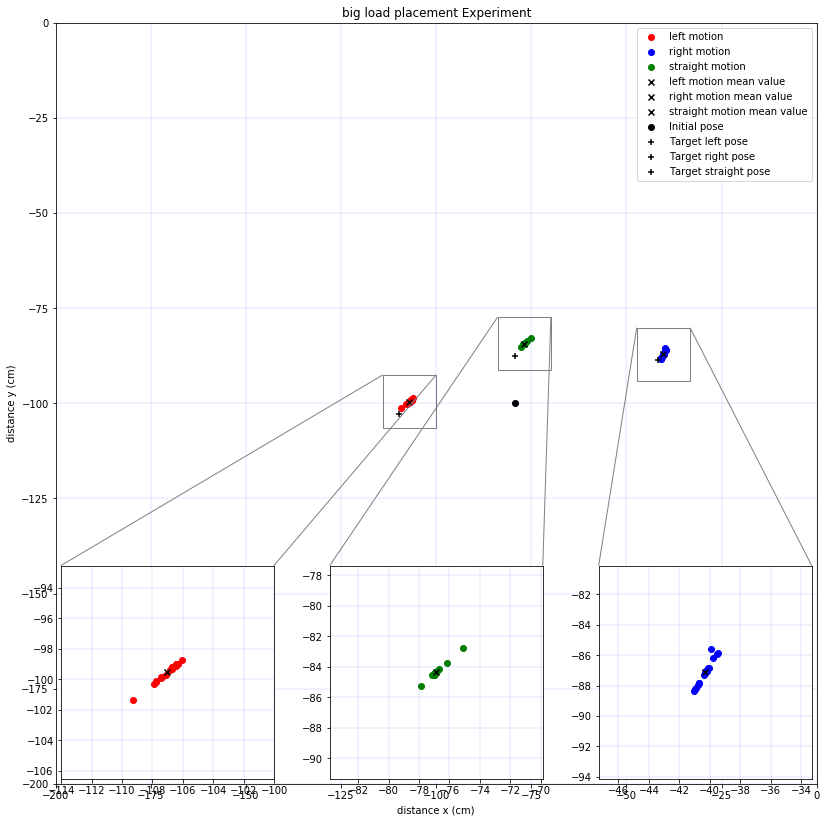

In [9]:
plot_data(data['big_left'], data['big_right'], data['big_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='big', save_fig=True)

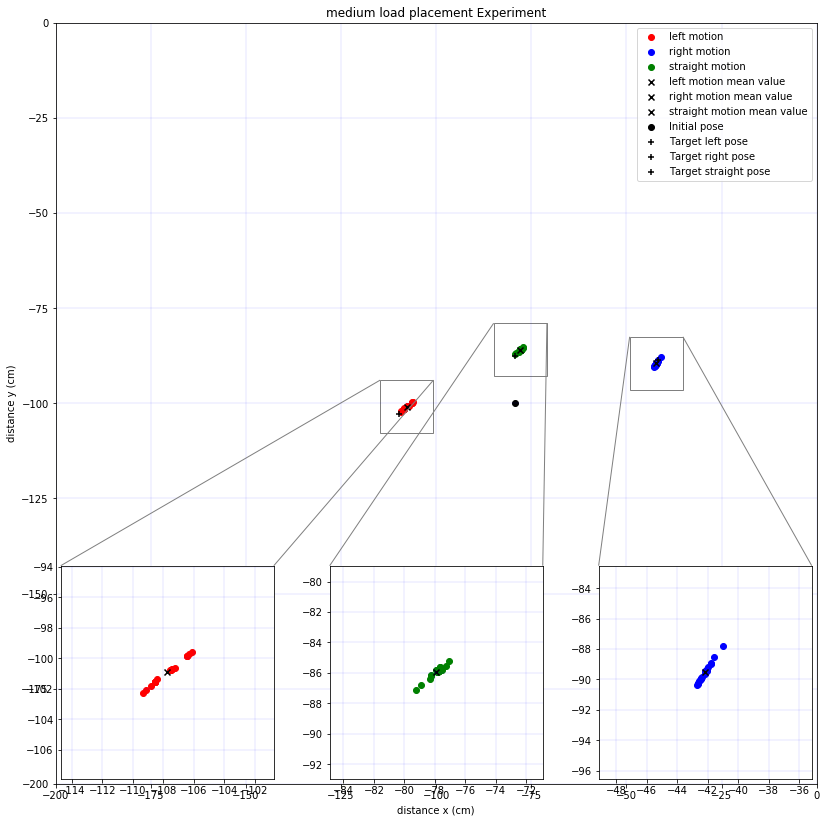

In [10]:
plot_data(data['medium_left'], data['medium_right'], data['medium_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='medium', save_fig=True)

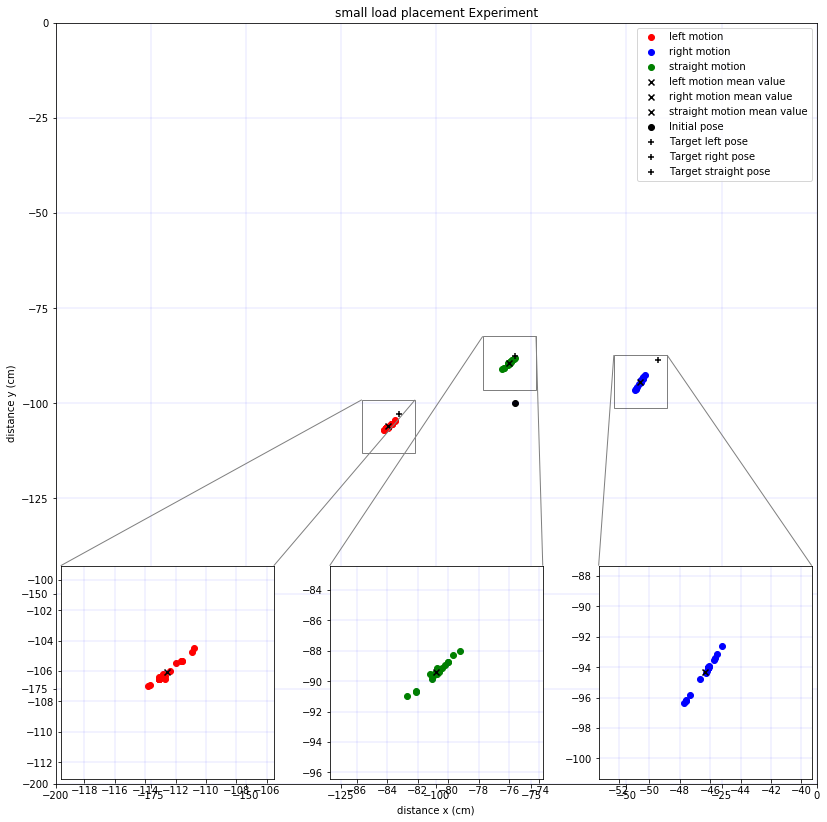

In [11]:
plot_data(data['small_left'], data['small_right'], data['small_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='small', save_fig=True)

## Statistical Analysis

### Mean deviations

In [12]:
display('Mean final position')

print('Big weight:')
print('L turn motion: (x, y, theta):',
      np.round(np.mean(data['big_left'][:,0]), decimals=1),
      np.round(np.mean(data['big_left'][:,1]), decimals=1),
      np.round(np.mean(data['big_left'][:,2]), decimals=1))
print('S turn motion: (x, y, theta):',
      np.round(np.mean(data['big_straight'][:,0]), decimals=1),
      np.round(np.mean(data['big_straight'][:,1]), decimals=1),
      np.round(np.mean(data['big_straight'][:,2]), decimals=1))
print('R turn motion: (x, y, theta):',
      np.round(np.mean(data['big_right'][:,0]), decimals=1),
      np.round(np.mean(data['big_right'][:,1]), decimals=1),
      np.round(np.mean(data['big_right'][:,2]), decimals=1))


print('\nMeidum weight:')
print('L turn motion: (x, y, theta):',
      np.round(np.mean(data['medium_left'][:,0]), decimals=1),
      np.round(np.mean(data['medium_left'][:,1]), decimals=1),
      np.round(np.mean(data['medium_left'][:,2]), decimals=1))
print('S turn motion: (x, y, theta):',
      np.round(np.mean(data['medium_straight'][:,0]), decimals=1),
      np.round(np.mean(data['medium_straight'][:,1]), decimals=1),
      np.round(np.mean(data['medium_straight'][:,2]), decimals=1))
print('R turn motion: (x, y, theta):',
      np.round(np.mean(data['medium_right'][:,0]), decimals=1),
      np.round(np.mean(data['medium_right'][:,1]), decimals=1),
      np.round(np.mean(data['medium_right'][:,2]), decimals=1))

print('\nSmall weight:')
print('L turn motion: (x, y, theta):',
      np.round(np.mean(data['small_left'][:,0]), decimals=1),
      np.round(np.mean(data['small_left'][:,1]), decimals=1),
      np.round(np.mean(data['small_left'][:,2]), decimals=1))
print('S turn motion: (x, y, theta):',
      np.round(np.mean(data['small_straight'][:,0]), decimals=1),
      np.round(np.mean(data['small_straight'][:,1]), decimals=1),
      np.round(np.mean(data['small_straight'][:,2]), decimals=1))
print('R turn motion: (x, y, theta):',
      np.round(np.mean(data['small_right'][:,0]), decimals=1),
      np.round(np.mean(data['small_right'][:,1]), decimals=1),
      np.round(np.mean(data['small_right'][:,2]), decimals=1))

'Mean final position'

Big weight:
L turn motion: (x, y, theta): -107.0 -99.5 -2.1
S turn motion: (x, y, theta): -76.9 -84.4 -1.6
R turn motion: (x, y, theta): -40.3 -87.1 -0.9

Meidum weight:
L turn motion: (x, y, theta): -107.7 -100.9 -2.1
S turn motion: (x, y, theta): -77.9 -86.0 -1.6
R turn motion: (x, y, theta): -42.2 -89.5 -0.9

Small weight:
L turn motion: (x, y, theta): -112.5 -106.1 -2.1
S turn motion: (x, y, theta): -80.8 -89.4 -1.6
R turn motion: (x, y, theta): -46.3 -94.3 -0.9


### Standard deviations

In [13]:
display('Standard deviations in final position')

print('Big weight:')
print('L turn motion (x, y, theta):',
      np.round(np.std(data['big_left'][:,0]), decimals=1),
      np.round(np.std(data['big_left'][:,1]), decimals=1),
      np.round(np.std(data['big_left'][:,2]), decimals=1))
print('S turn motion (x, y, theta):',
      np.round(np.std(data['big_straight'][:,0]), decimals=1),
      np.round(np.std(data['big_straight'][:,1]), decimals=1),
      np.round(np.std(data['big_straight'][:,2]), decimals=1))
print('R turn motion (x, y, theta):',
      np.round(np.std(data['big_right'][:,0]), decimals=1),
      np.round(np.std(data['big_right'][:,1]), decimals=1),
      np.round(np.std(data['big_right'][:,2]), decimals=1))


print('\nMeidum weight:')
print('L turn motion (x, y, theta):',
      np.round(np.std(data['medium_left'][:,0]), decimals=1),
      np.round(np.std(data['medium_left'][:,1]), decimals=1),
      np.round(np.std(data['medium_left'][:,2]), decimals=1))
print('S turn motion (x, y, theta):',
      np.round(np.std(data['medium_straight'][:,0]), decimals=1),
      np.round(np.std(data['medium_straight'][:,1]), decimals=1),
      np.round(np.std(data['medium_straight'][:,2]), decimals=1))
print('R turn motion (x, y, theta):',
      np.round(np.std(data['medium_right'][:,0]), decimals=1),
      np.round(np.std(data['medium_right'][:,1]), decimals=1),
      np.round(np.std(data['medium_right'][:,2]), decimals=1))

print('\nSmall weight:')
print('L turn motion (x, y, theta):',
      np.round(np.std(data['small_left'][:,0]), decimals=1),
      np.round(np.std(data['small_left'][:,1]), decimals=1),
      np.round(np.std(data['small_left'][:,2]), decimals=1))
print('S turn motion (x, y, theta):',
      np.round(np.std(data['small_straight'][:,0]), decimals=1),
      np.round(np.std(data['small_straight'][:,1]), decimals=1),
      np.round(np.std(data['small_straight'][:,2]), decimals=1))
print('R turn motion (x, y, theta):',
      np.round(np.std(data['small_right'][:,0]), decimals=1),
      np.round(np.std(data['small_right'][:,1]), decimals=1),
      np.round(np.std(data['small_right'][:,2]), decimals=1))

'Standard deviations in final position'

Big weight:
L turn motion (x, y, theta): 0.7 0.6 0.0
S turn motion (x, y, theta): 0.5 0.4 0.1
R turn motion (x, y, theta): 0.4 0.8 0.0

Meidum weight:
L turn motion (x, y, theta): 1.0 0.8 0.0
S turn motion (x, y, theta): 0.5 0.4 0.2
R turn motion (x, y, theta): 0.4 0.6 0.1

Small weight:
L turn motion (x, y, theta): 0.8 0.7 0.1
S turn motion (x, y, theta): 0.8 0.7 0.1
R turn motion (x, y, theta): 0.7 1.0 0.0


## Combining data from Group 2

In [14]:
data_combined = collect_combined_data(load, move, generate_plots=False)

### Plotting the distributions

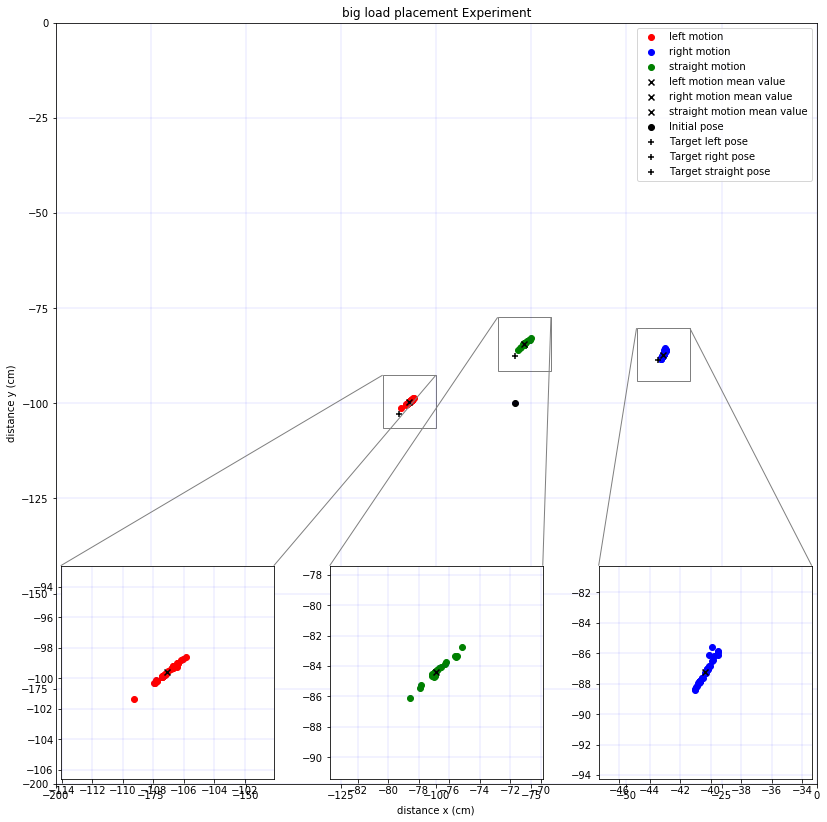

In [15]:
plot_data(data_combined['big_left'], data_combined['big_right'], data_combined['big_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='big',
          combined_data=True, save_fig=True)

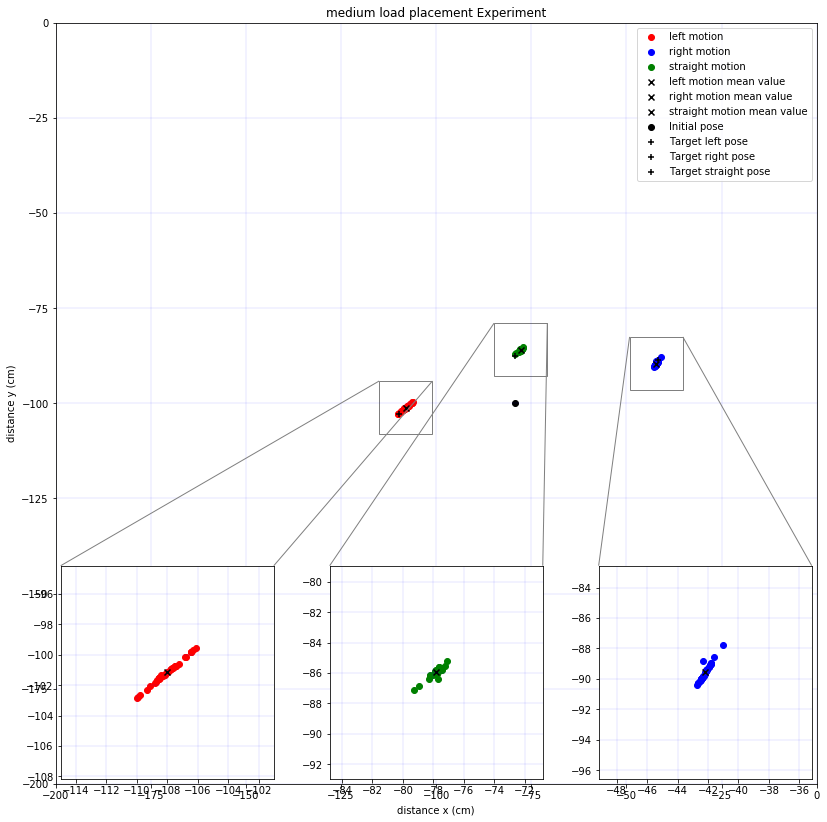

In [16]:
plot_data(data_combined['medium_left'], data_combined['medium_right'], data_combined['medium_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='medium',
          combined_data=True, save_fig=True)

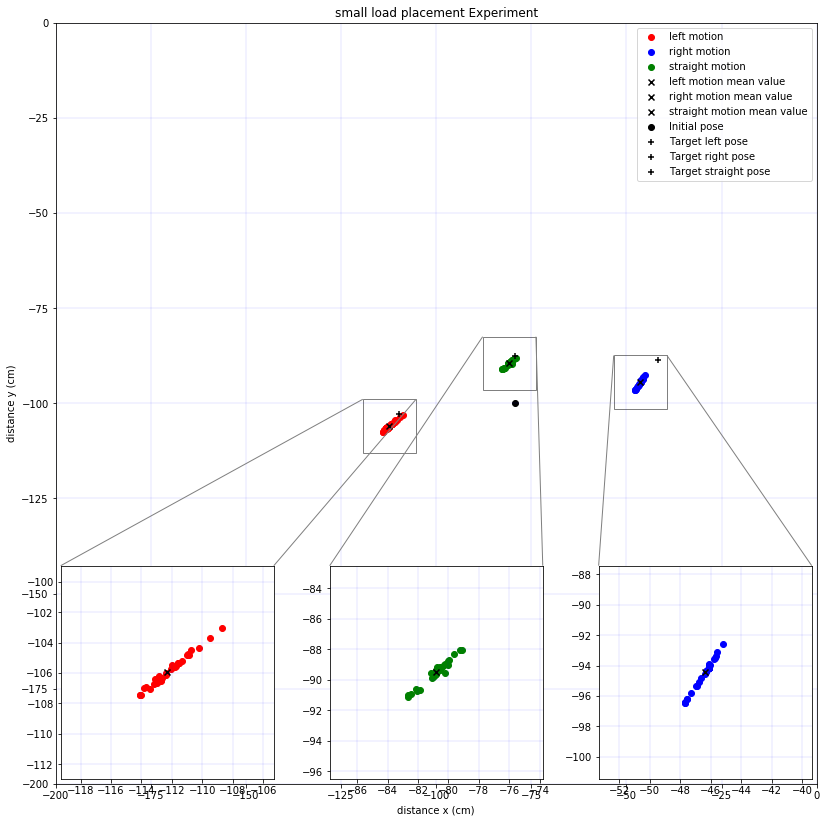

In [17]:
plot_data(data_combined['small_left'], data_combined['small_right'], data_combined['small_straight'],
          initial_pose, target_left, target_right, target_straight, load_type='small',
          combined_data=True, save_fig=True)

### Mean deviations

In [18]:
display('Mean final position')

print('Big weight:')
print('L turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['big_left'][:,0]), decimals=1),
      np.round(np.mean(data_combined['big_left'][:,1]), decimals=1),
      np.round(np.mean(data_combined['big_left'][:,2]), decimals=1))
print('S turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['big_straight'][:,0]), decimals=1),
      np.round(np.mean(data_combined['big_straight'][:,1]), decimals=1),
      np.round(np.mean(data_combined['big_straight'][:,2]), decimals=1))
print('R turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['big_right'][:,0]), decimals=1),
      np.round(np.mean(data_combined['big_right'][:,1]), decimals=1),
      np.round(np.mean(data_combined['big_right'][:,2]), decimals=1))


print('\nMeidum weight:')
print('L turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['medium_left'][:,0]), decimals=1),
      np.round(np.mean(data_combined['medium_left'][:,1]), decimals=1),
      np.round(np.mean(data_combined['medium_left'][:,2]), decimals=1))
print('S turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['medium_straight'][:,0]), decimals=1),
      np.round(np.mean(data_combined['medium_straight'][:,1]), decimals=1),
      np.round(np.mean(data_combined['medium_straight'][:,2]), decimals=1))
print('R turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['medium_right'][:,0]), decimals=1),
      np.round(np.mean(data_combined['medium_right'][:,1]), decimals=1),
      np.round(np.mean(data_combined['medium_right'][:,2]), decimals=1))

print('\nSmall weight:')
print('L turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['small_left'][:,0]), decimals=1),
      np.round(np.mean(data_combined['small_left'][:,1]), decimals=1),
      np.round(np.mean(data_combined['small_left'][:,2]), decimals=1))
print('S turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['small_straight'][:,0]), decimals=1),
      np.round(np.mean(data_combined['small_straight'][:,1]), decimals=1),
      np.round(np.mean(data_combined['small_straight'][:,2]), decimals=1))
print('R turn motion: (x, y, theta):',
      np.round(np.mean(data_combined['small_right'][:,0]), decimals=1),
      np.round(np.mean(data_combined['small_right'][:,1]), decimals=1),
      np.round(np.mean(data_combined['small_right'][:,2]), decimals=1))

'Mean final position'

Big weight:
L turn motion: (x, y, theta): -107.1 -99.6 -2.1
S turn motion: (x, y, theta): -76.9 -84.4 -1.6
R turn motion: (x, y, theta): -40.4 -87.3 -0.9

Meidum weight:
L turn motion: (x, y, theta): -108.0 -101.2 -2.1
S turn motion: (x, y, theta): -77.8 -86.0 -1.6
R turn motion: (x, y, theta): -42.2 -89.6 -0.8

Small weight:
L turn motion: (x, y, theta): -112.3 -106.0 -2.1
S turn motion: (x, y, theta): -80.8 -89.5 -1.7
R turn motion: (x, y, theta): -46.4 -94.4 -0.9


### Standard deviations in the final pose

In [19]:
display('Standard deviations in final position')

print('Big weight:')
print('L turn motion (x, y, theta):',
      np.round(np.std(data_combined['big_left'][:,0]), decimals=1),
      np.round(np.std(data_combined['big_left'][:,1]), decimals=1),
      np.round(np.std(data_combined['big_left'][:,2]), decimals=1))
print('S turn motion (x, y, theta):',
      np.round(np.std(data_combined['big_straight'][:,0]), decimals=1),
      np.round(np.std(data_combined['big_straight'][:,1]), decimals=1),
      np.round(np.std(data_combined['big_straight'][:,2]), decimals=1))
print('R turn motion (x, y, theta):',
      np.round(np.std(data_combined['big_right'][:,0]), decimals=1),
      np.round(np.std(data_combined['big_right'][:,1]), decimals=1),
      np.round(np.std(data_combined['big_right'][:,2]), decimals=1))


print('\nMeidum weight:')
print('L turn motion (x, y, theta):',
      np.round(np.std(data_combined['medium_left'][:,0]), decimals=1),
      np.round(np.std(data_combined['medium_left'][:,1]), decimals=1),
      np.round(np.std(data_combined['medium_left'][:,2]), decimals=1))
print('S turn motion (x, y, theta):',
      np.round(np.std(data_combined['medium_straight'][:,0]), decimals=1),
      np.round(np.std(data_combined['medium_straight'][:,1]), decimals=1),
      np.round(np.std(data_combined['medium_straight'][:,2]), decimals=1))
print('R turn motion (x, y, theta):',
      np.round(np.std(data_combined['medium_right'][:,0]), decimals=1),
      np.round(np.std(data_combined['medium_right'][:,1]), decimals=1),
      np.round(np.std(data_combined['medium_right'][:,2]), decimals=1))

print('\nSmall weight:')
print('L turn motion (x, y, theta):',
      np.round(np.std(data_combined['small_left'][:,0]), decimals=1),
      np.round(np.std(data_combined['small_left'][:,1]), decimals=1),
      np.round(np.std(data_combined['small_left'][:,2]), decimals=1))
print('S turn motion (x, y, theta):',
      np.round(np.std(data_combined['small_straight'][:,0]), decimals=1),
      np.round(np.std(data_combined['small_straight'][:,1]), decimals=1),
      np.round(np.std(data_combined['small_straight'][:,2]), decimals=1))
print('R turn motion (x, y, theta):',
      np.round(np.std(data_combined['small_right'][:,0]), decimals=1),
      np.round(np.std(data_combined['small_right'][:,1]), decimals=1),
      np.round(np.std(data_combined['small_right'][:,2]), decimals=1))

'Standard deviations in final position'

Big weight:
L turn motion (x, y, theta): 0.6 0.5 0.0
S turn motion (x, y, theta): 0.6 0.6 0.1
R turn motion (x, y, theta): 0.4 0.7 0.0

Meidum weight:
L turn motion (x, y, theta): 1.0 0.8 0.0
S turn motion (x, y, theta): 0.4 0.3 0.1
R turn motion (x, y, theta): 0.3 0.5 0.1

Small weight:
L turn motion (x, y, theta): 1.2 1.0 0.1
S turn motion (x, y, theta): 0.8 0.7 0.2
R turn motion (x, y, theta): 0.6 0.9 0.0


## Hypothesis testing

#### Hypothesis: changing the shape and mass of an object affect the final placing pose

In [20]:
acceptable_distance = np.array([2.5, 2.5, 0.2])

In [21]:
def get_misclassifications(num_samples, acceptable_distance, move='left', data=data_combined, load=load):
    small = data[load[0]+'_'+move]
    medium = data[load[1]+'_'+move]
    big = data[load[2]+'_'+move]
    
    misclassifications = 0
    for i in range(num_samples):
        k = np.random.randint(len(small), size=2)
        set_selection = np.random.randint(3)
        if set_selection == 0:
            set1 = small
            set2 = medium
        elif set_selection == 1:
            set1 = small
            set2 = big
        else:
            set1 = medium
            set2 = big
        if not any(abs(set1[k[0], :] - set2[k[1], :]) > acceptable_distance):
            misclassifications += 1
    return misclassifications

In [22]:
def get_sampling_error(num_experiments, num_samples, threshold=acceptable_distance):
    
    misclassifications = []
    
    for exp in range(num_experiments):
        mis_left = get_misclassifications(num_samples, threshold, move='left')
        mis_straight = get_misclassifications(num_samples, threshold, move='straight')
        mis_right = get_misclassifications(num_samples, threshold, move='right')
        total_misclassifications = mis_left + mis_straight + mis_right
        misclassifications.append(total_misclassifications)

    average_misclassification = ceil(np.mean(misclassifications))
    sampling_error = average_misclassification / (3 * num_samples)
    confidence = 1.96 * np.sqrt((sampling_error * (1-sampling_error))/ (3 * num_samples))
    
    return average_misclassification, sampling_error, confidence

In [23]:
avg_misc, sampling_error, confidence = get_sampling_error(num_experiments=100, num_samples=20)
print('average misclassifications =', avg_misc)
print('sampling error = ', sampling_error)
print('95% confidence = ', confidence)

average misclassifications = 16
sampling error =  0.26666666666666666
95% confidence =  0.11189624824081623
